<a href="https://colab.research.google.com/github/manogna1105/Customer-Segmentation-Prediction/blob/main/Cust_Segmentation_%26_Predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 Customer Segmentation and Prediction Project (Python)**
# 🔧 Setup

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Display Settings
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


# 📥 1. Load and Clean Data

In [ ]:
# Load Dataset
df = pd.read_csv('customer_data.csv')  # Replace with your actual dataset path

# Initial Check
print(df.head())
print(df.info())
print(df.isnull().sum())

# Clean Data
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)  # Modify based on domain knowledge

# Convert date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsP

<ipython-input-4-f7d39e8df897>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Modify based on domain knowledge


# 🔧 2. Feature Engineering

In [ ]:
# Rename ID column for clarity
df.rename(columns={'ID': 'customer_id'}, inplace=True)

# Recency (days since enrollment)
reference_date = df['Dt_Customer'].max()
df['recency'] = (reference_date - df['Dt_Customer']).dt.days

# Frequency: total number of purchases across all channels
df['purchase_count'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Monetary Value: total amount spent
df['total_spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Average Order Value (AOV)
# Since we don't have quantity or order-level data, we'll use: AOV = total_spent / total_purchases
df['avg_order_value'] = df['total_spent'] / (df['purchase_count'].replace(0, 1))  # avoid division by zero

# Final customer-level features for clustering/prediction
features = df[['customer_id', 'recency', 'purchase_count', 'avg_order_value', 'total_spent']]

# Display sample
features.head()



,customer_id,recency,purchase_count,avg_order_value,total_spent
0,5524,663,22,73.500000,1617
1,2174,113,4,6.750000,27
2,4141,312,20,38.800000,776
3,6182,139,6,8.833333,53
4,5324,161,14,30.142857,422


from matplotlib import pyplot as plt
_df_0['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['purchase_count'].plot(kind='hist', bins=20, title='purchase_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['avg_order_value'].plot(kind='hist', bins=20, title='avg_order_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='customer_id', y='recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='recency', y='purchase_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='purchase_count', y='avg_order_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='avg_order_value', y='total_spent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['customer_id'].plot(kind='line', figsize=(8, 4), title='customer_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['purchase_count'].plot(kind='line', figsize=(8, 4), title='purchase_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['avg_order_value'].plot(kind='line', figsize=(8, 4), title='avg_order_value')
plt.gca().spines[['top', 'right']].set_visible(False)

# 📊 3. Customer Segmentation (K-Means)

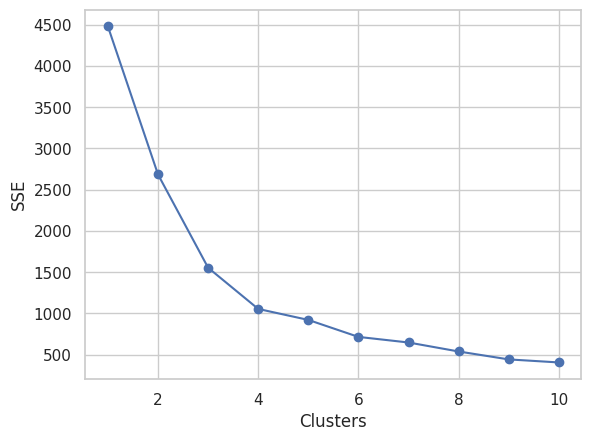

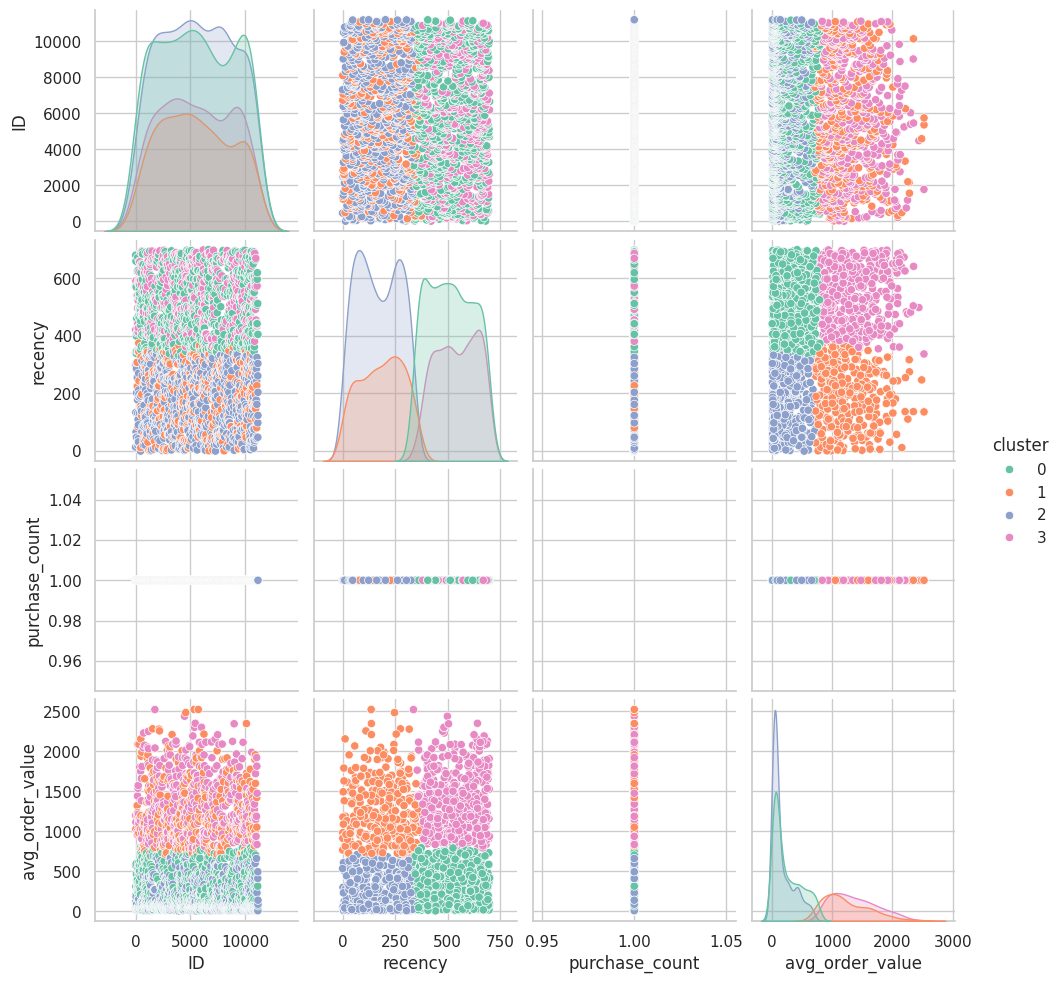

In [ ]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[['recency', 'purchase_count', 'avg_order_value']])

# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

# Final Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
features['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize
sns.pairplot(features, hue='cluster', palette='Set2')
plt.show()


# 📈 4. Predictive Modeling

In [ ]:
# Aggregate total_spent
df_grouped = df.groupby('ID').agg({
    'total_spent': 'sum'
}).reset_index()

# Merge with features
model_data = features.merge(df_grouped, on='ID')

# Train-test split
X = model_data[['recency', 'purchase_count', 'avg_order_value']]
y = model_data['total_spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 5. Evaluation

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

RMSE: 2.57
R^2 Score: 1.00


# 💡 6. Insights & Marketing Recommendations

In [ ]:
# Example Interpretation
cluster_summary = features.groupby('cluster').agg({
    'recency': 'mean',
    'purchase_count': 'mean',
    'avg_order_value': 'mean'
}).reset_index()

print(cluster_summary)


   cluster     recency  purchase_count  avg_order_value
0        0  512.583921             1.0       251.603667
1        1  184.342318             1.0      1240.994609
2        2  170.033195             1.0       165.822960
3        3  542.967963             1.0      1369.112128
